In [1]:
import folium
from folium.features import DivIcon
import folium.plugins
import numpy as np
import random

def show_shops_map(shops, my_map=None, day=0):
    def draw_shop(shop, color, fill_opacity=0.6, radius=2, txt=''):
        lat, lon = shop["location"]
        return folium.CircleMarker(
            location=[lat, lon], 
            popup = f'name:{shop["shopname"]}\n'+txt, 
            radius = max(0.01, radius), 
            color = color, 
            fill_opacity = fill_opacity,
            weight = 1, # gruix perimetre
            fill = True,
            fill_color = color
        )

    mymap = folium.Map(location=(41.401361, 2.174317), zoom_start=13, tiles="cartodbpositron", control_scale=True)

    all_shops_group = folium.FeatureGroup('Shops', overlay=True) # Pots fer capes per filtrar a posteriori
    for _id, shop in shops.items():
        draw_shop(
            shop,
            color = 'green' if shop["n_trans"] > 0 else 'red',
            fill_opacity = 0.1 if shop["n_trans"] > 0 else 0.3,
            radius=5, #(shop["n_trans"]**0.5716)*1.2, #formula per matenir proporcions visuals humanes
            txt=f'Transctions:{np.round(shop["n_trans"]**0.5716*1.2, 2)}',
        ).add_to(all_shops_group)

    all_shops_group.add_to(mymap)
    folium.LayerControl(collapsed=False).add_to(mymap)
    mymap.keep_in_front(all_shops_group)
    mymap.add_child(folium.plugins.Fullscreen())
    
    title_html = '''
             <h3 align="center" style="font-size:16px"><b>day: {}</b></h3>
             '''.format(day)
    mymap.get_root().html.add_child(folium.Element(title_html))
    return mymap

In [3]:
import pandas as pd

def preprocessDF(path):
    shops = pd.read_csv(path, index_col=0)
    shops["n_trans"] = 0
    shops.n_trans = shops.n_trans.map(lambda x: random.randint(0,30))
    shops = shops.set_index(shops._id)
    shops.location = shops.location.map(lambda x: [y.strip("[ '']") for y in x.split(",")])
    shops.tags = shops.tags.map(lambda x: [y.strip("[ '']") for y in x.split(",")])
    shops_dict = shops.to_dict(orient='index')
    return shops_dict

In [4]:
import folium
from selenium import webdriver
import os
import time

def make_screenshot(m, img_name):
    m.save("index.html")
    mapUrl = 'file://{0}/{1}'.format(os.getcwd(), "index.html")
    driver = driver=webdriver.Firefox(executable_path="./geckodriver",log_path=None)
    driver.get(mapUrl)
    time.sleep(5)
    driver.save_screenshot(f'./img/{img_name}.png')
    driver.quit()

In [5]:
path = "/Users/tomas.gadea/tomasgadea/ACADEMIC/GCED/q6/PE/beco-project/backend/data_base/map/shops.csv"
shops_dict = preprocessDF(path)
m = show_shops_map(shops_dict, day=10)
#make_screenshot(m, f"{i:03d}")
m

In [6]:
import folium

loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

m = folium.Map(location=[27.783889, -97.510556],
               zoom_start=12)

m.get_root().html.add_child(folium.Element(title_html))

m.save('map-with-title.html')
m

In [45]:
import pandas as pd
import seaborn as sns

In [58]:
df010 = pd.DataFrame(pd.read_csv("img/heat-u010.csv").mean(axis=0)).rename(columns={0:"10"})
df050 = pd.DataFrame(pd.read_csv("img/heat-u050.csv").mean(axis=0)).rename(columns={0:"50"})
df100 = pd.DataFrame(pd.read_csv("img/heat-u100.csv").mean(axis=0)).rename(columns={0:"100"})
df200 = pd.DataFrame(pd.read_csv("img/heat-u200.csv").mean(axis=0)).rename(columns={0:"200"})
df300 = pd.DataFrame(pd.read_csv("img/heat-u300.csv").mean(axis=0)).rename(columns={0:"300"})
df400 = pd.DataFrame(pd.read_csv("img/heat-u400.csv").mean(axis=0)).rename(columns={0:"400"})
df500 = pd.DataFrame(pd.read_csv("img/heat-u500.csv").mean(axis=0)).rename(columns={0:"500"})

In [59]:
matrix = df010.join(df050).join(df100).join(df200).join(df300).join(df400).join(df500)
matrix

,10,50,100,200,300,400,500
1,1000.0,68.000000,30.333333,18.000000,9.000000,10.0,10.5
3,1000.0,26.333333,9.333333,5.333333,5.666667,5.0,2.0
5,1000.0,12.666667,4.666667,5.000000,2.666667,2.0,1.5
10,1000.0,7.000000,4.000000,1.666667,1.666667,1.0,1.0
20,1000.0,6.333333,1.333333,1.000000,1.000000,1.0,1.0


In [60]:
np.log(matrix)

,10,50,100,200,300,400,500
1,6.907755,4.219508,3.412247,2.890372,2.197225,2.302585,2.351375
3,6.907755,3.270836,2.233592,1.673976,1.734601,1.609438,0.693147
5,6.907755,2.538974,1.540445,1.609438,0.980829,0.693147,0.405465
10,6.907755,1.945910,1.386294,0.510826,0.510826,0.000000,0.000000
20,6.907755,1.845827,0.287682,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

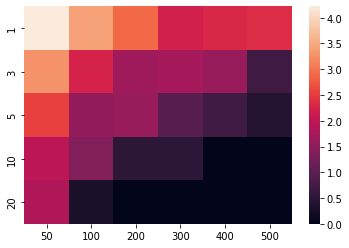

In [62]:
sns.heatmap(np.log(matrix.iloc[:,1:]))